In [1]:
import pandas as pd

C:\Users\91705\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
import pandas as pd

# Replace 'your_file.csv' with the path to your CSV file
df = pd.read_csv('reviews.csv')

# Display the first few rows of the dataframe
df.sample(5)

,ReviewId,RecipeId,AuthorId,AuthorName,Rating,Review,DateSubmitted,DateModified
706652,778260,54124,453828,artistclogger,5,Yummy soup! Followed the directions as descri...,2009-01-01T17:06:01Z,2009-01-01T17:06:01Z
339686,362841,49161,168462,Cilantro in Canada,5,This is a roast with lots of flavour and heat....,2007-01-22T14:10:36Z,2007-01-22T14:10:36Z
1086655,1243697,78908,1491034,Mommys good stuff,5,Wonderful!!! I added 3 bulion cubes to the wa...,2011-08-19T16:56:54Z,2011-08-19T16:56:54Z
975671,1116699,423970,424680,Sydney Mike,5,I did cut this recipe in half but still used a...,2010-06-15T14:30:11Z,2010-06-15T14:30:11Z
355355,379568,198454,377581,forthefunofit,4,Yummy. I used honey wheat baking mix and 1 cup...,2007-02-28T18:46:50Z,2007-02-28T18:46:50Z


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1401982 entries, 0 to 1401981
Data columns (total 8 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   ReviewId       1401982 non-null  int64 
 1   RecipeId       1401982 non-null  int64 
 2   AuthorId       1401982 non-null  int64 
 3   AuthorName     1401982 non-null  object
 4   Rating         1401982 non-null  int64 
 5   Review         1401768 non-null  object
 6   DateSubmitted  1401982 non-null  object
 7   DateModified   1401982 non-null  object
dtypes: int64(4), object(4)
memory usage: 85.6+ MB


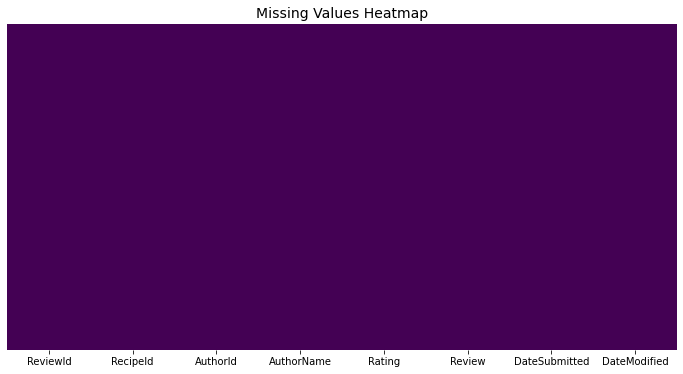

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (replace with your actual dataset file)
df = pd.read_csv('reviews.csv')  

# Set the figure size
plt.figure(figsize=(12, 6))

# Create a heatmap of missing values
sns.heatmap(df.isnull(), cmap="viridis", cbar=False, yticklabels=False)

# Add title
plt.title("Missing Values Heatmap", fontsize=14)

# Show plot
plt.show()


In [5]:
# Calculate the percentage of missing values per column
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Convert to a DataFrame for better readability
missing_df = pd.DataFrame({"Column": df.columns, "Missing Percentage": missing_percentage})

# Display only columns with missing values
missing_df = missing_df[missing_df["Missing Percentage"] > 0].sort_values(by="Missing Percentage", ascending=False)

# Calculate the overall percentage of missing values
overall_missing_percentage = (df.isnull().sum().sum() / (df.shape[0] * df.shape[1])) * 100

# Print results
print("Percentage of Missing Values in Each Column:\n")
print(missing_df)
print("\nOverall Percentage of Missing Values in the Dataset: {:.2f}%".format(overall_missing_percentage))

Percentage of Missing Values in Each Column:

        Column  Missing Percentage
Review  Review            0.015264

Overall Percentage of Missing Values in the Dataset: 0.00%


In [6]:
import pandas as pd

df_cleaned = df.dropna(subset=['Review'])

# Display information about the cleaned dataset
df_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1401768 entries, 0 to 1401981
Data columns (total 8 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   ReviewId       1401768 non-null  int64 
 1   RecipeId       1401768 non-null  int64 
 2   AuthorId       1401768 non-null  int64 
 3   AuthorName     1401768 non-null  object
 4   Rating         1401768 non-null  int64 
 5   Review         1401768 non-null  object
 6   DateSubmitted  1401768 non-null  object
 7   DateModified   1401768 non-null  object
dtypes: int64(4), object(4)
memory usage: 96.3+ MB


In [7]:
import pandas as pd

# Convert DateSubmitted to datetime format
df_cleaned['DateSubmitted'] = pd.to_datetime(df_cleaned['DateSubmitted'], errors='coerce')

# Extract the year
df_cleaned['Year'] = df_cleaned['DateSubmitted'].dt.year

# Check if conversion worked
print(df_cleaned[['DateSubmitted', 'Year']].head())

              DateSubmitted  Year
0 2000-01-25 21:44:00+00:00  2000
1 2001-10-17 16:49:59+00:00  2001
2 2000-02-25 09:00:00+00:00  2000
3 2000-03-13 21:15:00+00:00  2000
4 2000-03-28 12:51:00+00:00  2000


<ipython-input-7-af9ca6365b3f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['DateSubmitted'] = pd.to_datetime(df_cleaned['DateSubmitted'], errors='coerce')
<ipython-input-7-af9ca6365b3f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Year'] = df_cleaned['DateSubmitted'].dt.year


## Analysis of Cleaned Data

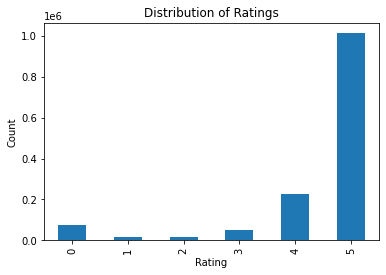

In [8]:
import matplotlib.pyplot as plt
df_cleaned['Rating'].value_counts().sort_index().plot(kind='bar', title="Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


In [9]:
top_reviewers = df_cleaned['AuthorName'].value_counts().head(10)
top_recipes = df_cleaned['RecipeId'].value_counts().head(10)

In [10]:
top_reviewers

AuthorName
Sydney Mike            8842
Sharon123              6605
Boomette               5438
Baby Kato              4693
Annacia                4586
Kittencalrecipezazz    3963
Rita1652               3743
Parsley                3688
PaulaG                 3590
lazyme                 3543
Name: count, dtype: int64

In [11]:
top_recipes

RecipeId
45809    2892
2886     2177
27208    1614
89204    1584
39087    1491
67256    1359
35813    1352
54257    1325
22782    1273
32204    1228
Name: count, dtype: int64

<ipython-input-12-76b766954b85>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Year'] = df_cleaned['DateSubmitted'].dt.year


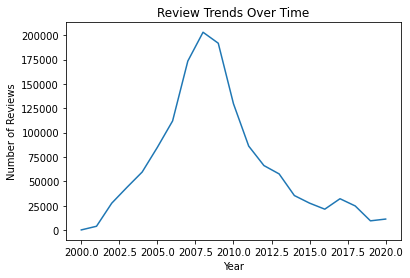

In [12]:
df_cleaned['Year'] = df_cleaned['DateSubmitted'].dt.year
df_cleaned.groupby('Year').size().plot(kind='line', title="Review Trends Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Reviews")
plt.show()


<Axes: title={'center': 'Average Rating Over Time'}, xlabel='Year'>

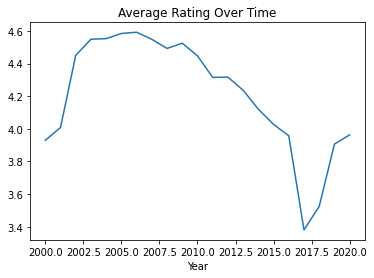

In [13]:
df_cleaned.groupby('Year')['Rating'].mean().plot(kind='line', title="Average Rating Over Time")
